In [11]:
from __future__ import print_function

In [4]:
figure_folder = 'figures/010_investigate_weird_negative_diagonal'
! mkdir -p $figure_folder

In [12]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



%matplotlib inline


import flotilla
sns.set(style='white', context='paper')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [13]:
miso_outrigger_comparison = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv')
print(miso_outrigger_comparison.shape)
miso_outrigger_comparison.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,NaN,NaN,46.0,NaN,NaN,SE


In [14]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

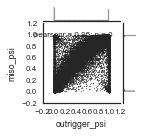

In [15]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_outrigger_comparison, color='#262626', 
                  joint_kws=dict(alpha=0.5, rasterized=True, s=1), size=2)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)

In [16]:
miso_outrigger_comparison_fillna = miso_outrigger_comparison.fillna(-0.1)
print(miso_psi_comparison_dropna_fillna.shape)
miso_outrigger_comparison_fillna.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,9.0,-0.1,-0.1,-0.1,-0.1,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,7.0,-0.1,-0.1,-0.1,-0.1,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4,-0.1,-0.1,-0.1,23.0,-0.1,-0.1,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3,5.0,-0.1,-0.1,-0.1,-0.1,-0.1,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,-0.1,-0.1,46.0,-0.1,-0.1,SE


In [29]:
pd.options.display.max_colwidth = 300

In [31]:
negative_diagonal = miso_outrigger_comparison.query('abs((miso_psi + outrigger_psi) - 1) <= 0.05')
print(negative_diagonal.shape)
negative_diagonal.head(20)

(11938, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
502,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_11,0.62,0.412371,Case 8: Sufficient reads on all junctions,Case 8,34.0,57.0,NaN,46.0,NaN,NaN,SE
503,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P7_07,0.61,0.396040,Case 8: Sufficient reads on all junctions,Case 8,41.0,61.0,NaN,39.0,NaN,NaN,SE
711,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,M1_06,0.03,1.000000,Case 7: Inclusion,Case 7,35.0,NaN,NaN,NaN,17.0,NaN,MXE
722,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,MSA_05,0.01,1.000000,Case 7: Inclusion,Case 7,66.0,NaN,NaN,NaN,50.0,NaN,MXE
730,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P1_03,1.00,0.000000,Case 6: Exclusion,Case 6,NaN,78.0,4.0,NaN,NaN,57.0,MXE
748,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,N3_04,0.99,0.000000,Case 6: Exclusion,Case 6,NaN,83.0,NaN,NaN,NaN,67.0,MXE
754,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_09,0.97,0.000000,Case 6: Exclusion,Case 6,NaN,12.0,NaN,NaN,NaN,14.0,MXE
1714,chr10:102747070:102747272:-@chr10:102746847:102746953:-@chr10:102746506:102746732:-@chr10:102743705:102743831:-,N1_05,0.00,1.000000,Case 7: Inclusion,Case 7,461.0,NaN,NaN,NaN,692.0,NaN,MXE
2850,chr10:103563492:103563776:-@chr10:103559999:103560157:-@chr10:103558599:103559212:-,CVN_22,0.59,0.420000,Case 8: Sufficient reads on all junctions,Case 8,24.0,29.0,NaN,18.0,NaN,NaN,SE
3246,chr10:103567487:103567658:-@chr10:103565802:103565900:-@chr10:103563492:103563776:-@chr10:103559999:103560157:-,P4_01,0.98,0.000000,Case 6: Exclusion,Case 6,NaN,27.0,NaN,4.0,NaN,28.0,MXE


In [36]:
(110. + 141)/(110 + 141 + 2*339)

0.27018299246501615

In [34]:
negative_diagonal_not_zero_one = negative_diagonal.query('(miso_psi != 1) & (miso_psi != 0) & (outrigger_psi != 1)& (outrigger_psi != 0)')
print(negative_diagonal_not_zero_one.shape)
negative_diagonal_not_zero_one.head(20)

(2310, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
502,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_11,0.62,0.412371,Case 8: Sufficient reads on all junctions,Case 8,34.0,57.0,NaN,46.0,NaN,NaN,SE
503,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P7_07,0.61,0.396040,Case 8: Sufficient reads on all junctions,Case 8,41.0,61.0,NaN,39.0,NaN,NaN,SE
2850,chr10:103563492:103563776:-@chr10:103559999:103560157:-@chr10:103558599:103559212:-,CVN_22,0.59,0.420000,Case 8: Sufficient reads on all junctions,Case 8,24.0,29.0,NaN,18.0,NaN,NaN,SE
5747,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,MSA_14,0.74,0.270183,Case 8: Sufficient reads on all junctions,Case 8,110.0,339.0,NaN,141.0,NaN,NaN,SE
5789,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,P1_05,0.70,0.276382,Case 8: Sufficient reads on all junctions,Case 8,119.0,360.0,NaN,156.0,NaN,NaN,SE
5808,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,P2_13,0.81,0.235231,Case 8: Sufficient reads on all junctions,Case 8,104.0,356.0,NaN,115.0,NaN,NaN,SE
5835,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_05,0.80,0.240711,Case 8: Sufficient reads on all junctions,Case 8,58.0,235.0,NaN,91.0,NaN,NaN,SE
5836,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_06,0.71,0.266846,Case 8: Sufficient reads on all junctions,Case 8,44.0,136.0,NaN,55.0,NaN,NaN,SE
5839,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_13,0.69,0.311604,Case 8: Sufficient reads on all junctions,Case 8,105.0,264.0,NaN,134.0,NaN,NaN,SE
5843,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,N3_02,0.73,0.294118,Case 8: Sufficient reads on all junctions,Case 8,90.0,204.0,NaN,80.0,NaN,NaN,SE


In [37]:
event_id = 'chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-'

In [38]:
sample_ids = 'P1_05', 'P2_13'

In [41]:
miso_junctions = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_junctions_names.csv', 
                             index_col=0)
miso_junctions.head()

,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34
miso_id,,,,,,
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,junction:chr10:100147842-100148110:-,junction:chr10:100147065-100148110:-,NaN,junction:chr10:100147065-100147621:-,NaN,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,junction:chr10:100148266-100150354:-,junction:chr10:100147065-100150354:-,NaN,junction:chr10:100147065-100148110:-,NaN,NaN
chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,junction:chr10:100174592-100174765:-,junction:chr10:100174053-100174765:-,NaN,junction:chr10:100174053-100174488:-,NaN,NaN
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,junction:chr10:100185743-100186971:-,junction:chr10:100185478-100186971:-,NaN,junction:chr10:100185478-100185574:-,NaN,NaN
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,junction:chr10:100189647-100190327:-,junction:chr10:100189400-100190327:-,NaN,junction:chr10:100189400-100189547:-,NaN,NaN


In [40]:
miso_junctions_tidy = miso_junctions.unstack().reset_index()
miso_junctions_tidy = miso_junctions_tidy.rename(columns={'level_0': 'junction_numbers', 0:'junction_id'})
print(miso_junctions_tidy.shape)
miso_junctions_tidy.head()

(235752, 3)


,junction_numbers,miso_id,junction_id
0,junction_12,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,junction:chr10:100147842-100148110:-
1,junction_12,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,junction:chr10:100148266-100150354:-
2,junction_12,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,junction:chr10:100174592-100174765:-
3,junction_12,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,junction:chr10:100185743-100186971:-
4,junction_12,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,junction:chr10:100189647-100190327:-


In [43]:
miso_junctions.loc[event_id]

junction_12    junction:chr10:105155790-105156165:-
junction_13    junction:chr10:105152224-105156165:-
junction_14                                     NaN
junction_23    junction:chr10:105152224-105155502:-
junction_24                                     NaN
junction_34                                     NaN
Name: chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-, dtype: object

In [42]:
junction_reads = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/junction_reads_use_multimapping.csv')
print(junction_reads.shape)
junction_reads.head()

(6882315, 15)


,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
0,chr1,14830.0,14969.0,-,GT/AG,True,0.0,1.0,35.0,chr1:14830-14969:-,CVN_09,junction:chr1:14830-14969:-,14970.0,14829.0,1.0
1,chr1,15039.0,15795.0,-,GT/AG,True,0.0,1.0,49.0,chr1:15039-15795:-,CVN_09,junction:chr1:15039-15795:-,15796.0,15038.0,1.0
2,chr1,228777.0,237053.0,-,GT/AG,True,2.0,12.0,48.0,chr1:228777-237053:-,CVN_09,junction:chr1:228777-237053:-,237054.0,228776.0,14.0
3,chr1,320654.0,324287.0,+,GT/AG,True,0.0,1.0,28.0,chr1:320654-324287:+,CVN_09,junction:chr1:320654-324287:+,324288.0,320653.0,1.0
4,chr1,320939.0,321031.0,+,GT/AG,True,0.0,3.0,39.0,chr1:320939-321031:+,CVN_09,junction:chr1:320939-321031:+,321032.0,320938.0,3.0


In [44]:
junctions = miso_junctions.loc[event_id].dropna().values
junctions

array(['junction:chr10:105155790-105156165:-',
       'junction:chr10:105152224-105156165:-',
       'junction:chr10:105152224-105155502:-'], dtype=object)

In [45]:
junction_reads.query('(sample_id in @sample_ids) & (junction_id in @junctions)')

,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
3788984,chr10,105152224.0,105155502.0,-,GT/AG,True,115.0,0.0,45.0,chr10:105152224-105155502:-,P2_13,junction:chr10:105152224-105155502:-,105155503.0,105152223.0,115.0
3788985,chr10,105152224.0,105156165.0,-,GT/AG,True,356.0,0.0,46.0,chr10:105152224-105156165:-,P2_13,junction:chr10:105152224-105156165:-,105156166.0,105152223.0,356.0
3788986,chr10,105155790.0,105156165.0,-,GT/AG,True,104.0,0.0,43.0,chr10:105155790-105156165:-,P2_13,junction:chr10:105155790-105156165:-,105156166.0,105155789.0,104.0
4295417,chr10,105152224.0,105155502.0,-,GT/AG,True,153.0,3.0,45.0,chr10:105152224-105155502:-,P1_05,junction:chr10:105152224-105155502:-,105155503.0,105152223.0,156.0
4295418,chr10,105152224.0,105156165.0,-,GT/AG,True,358.0,2.0,45.0,chr10:105152224-105156165:-,P1_05,junction:chr10:105152224-105156165:-,105156166.0,105152223.0,360.0
4295420,chr10,105155790.0,105156165.0,-,GT/AG,True,119.0,0.0,44.0,chr10:105155790-105156165:-,P1_05,junction:chr10:105155790-105156165:-,105156166.0,105155789.0,119.0
